# Linear Regression-ish Pytorch

In [370]:
%load_ext autoreload
%autoreload 2

import astropy
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

import inspect


import apogee.tools.read as apread
import apogee.tools.path as apogee_path
from apogee.tools import bitmask
import collections

from apoNN.src.occam import Occam
from apoNN.src.datasets import ApogeeDataset,AspcapDataset
from apoNN.src.utils import get_mask_elem,dump,load
from apoNN.src.plotting import summarize_representation
import apoNN.src.vectors as vector


import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import torch.nn as nn
from sklearn.decomposition import PCA,KernelPCA

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2,interaction_only=True)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

apogee_path.change_dr(16)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [210]:
n_z = 5
n_data = 5000

In [3]:
allStar =  load("allStar_training_clean")
dataset=  AspcapDataset(filename="aspcap_training_clean",tensor_type=torch.FloatTensor,recenter=True)

In [4]:
spectra = torch.tensor(dataset.dataset["aspcap_interpolated"])

In [63]:
z = torch.randn(spectra.shape[0],n_z)
z.requires_grad=True

In [6]:
class LinearRegression(torch.nn.Module):
    def __init__(self,n_z,n_spectra):
        super(LinearRegression, self).__init__()
        self.fc = torch.nn.Linear(n_z, n_spectra)

    def forward(self, x):
        return self.fc(x)

In [126]:
linear = LinearRegression(21,spectra.shape[1])

In [127]:
loss = torch.nn.MSELoss()

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2,interaction_only=True)


x = poly.fit_transform(z.detach().numpy())

chain = list(poly._combinations(4,2,interaction_only=False,include_bias=True))

In [49]:
ones = torch.ones(len(z),1)

In [70]:
z_ones = torch.cat((z,ones),dim=1)

In [106]:
z_combs = torch.combinations(z_ones[0], with_replacement=True)
z_poly = z_combs[:,0]*z_combs[:,1]

In [128]:
optimizer = torch.optim.Adam(list(linear.parameters())+[z], lr=0.001)

In [111]:
zip(linear.parameters(),z)

In [194]:
for i in range(10000):
    for i in range(5000):
        spec = spectra[i].unsqueeze(0)
        z_current = z[i].unsqueeze(0)
        ones = torch.ones(len(z_current),1)
        z_ones = torch.cat((z_current,ones),dim=1)
        z_combs = torch.combinations(z_ones[0], with_replacement=True)
        z_poly = z_combs[:,0]*z_combs[:,1]
        #print(z_poly.shape)
        optimizer.zero_grad()
        spec_pred = linear(z_poly)
        err = loss(spec_pred,spec)
        err.backward()
        optimizer.step()
    print(f"err:{err}")

err:5.843939652550034e-05
err:5.72475946682971e-05
err:5.8929170336341485e-05
err:5.834120020153932e-05
err:6.354789366014302e-05
err:6.720069359289482e-05
err:6.892174860695377e-05
err:6.73470349283889e-05
err:6.691321323160082e-05
err:6.799044786021113e-05
err:7.124705007299781e-05
err:6.0700785979861394e-05
err:5.701966438209638e-05
err:5.8541729231365025e-05
err:6.384609150700271e-05
err:6.906018097652122e-05
err:6.46973421680741e-05
err:6.867863703519106e-05
err:6.271371967159212e-05
err:6.331200711429119e-05
err:6.036407285137102e-05
err:6.192846194608137e-05
err:6.0541406128322706e-05
err:6.457692506955937e-05
err:6.621775537496433e-05
err:6.521024624817073e-05
err:6.491994281532243e-05
err:6.158958422020078e-05
err:6.00826351728756e-05
err:5.830547888763249e-05
err:6.0990190831944346e-05
err:5.963362491456792e-05
err:6.374411896103993e-05
err:7.506177644245327e-05
err:7.452271529473364e-05
err:7.219800318125635e-05
err:6.558263703482226e-05
err:6.14943346590735e-05
err:6.090226

err:5.9220867115072906e-05
err:6.322252738755196e-05
err:5.967960532871075e-05
err:6.245297845453024e-05
err:5.933348074904643e-05
err:6.200917414389551e-05
err:5.946143937762827e-05
err:6.311765173450112e-05
err:5.967902689008042e-05
err:6.160845805425197e-05
err:5.931401756242849e-05
err:6.267687422223389e-05
err:5.942202915321104e-05
err:6.288331496762112e-05
err:5.937972673564218e-05
err:6.4078725699801e-05
err:5.962824434391223e-05
err:6.175429007271305e-05
err:5.9509839047677815e-05
err:6.161038618301973e-05
err:5.97781763644889e-05
err:6.237644993234426e-05
err:5.988554039504379e-05
err:6.209492858033627e-05
err:5.968225377728231e-05
err:6.240123184397817e-05
err:5.912718188483268e-05
err:6.221327203093097e-05
err:5.9618865634547547e-05
err:6.144568760646507e-05
err:5.9648853493854403e-05
err:6.153200956759974e-05
err:5.951683851890266e-05
err:6.217737245606259e-05
err:5.9631878684740514e-05
err:6.168193795019761e-05
err:5.953295112703927e-05
err:6.154136644909158e-05
err:5.9332

err:5.8208239352097735e-05
err:5.8041219745064154e-05
err:5.8399040426593274e-05
err:5.790036084363237e-05
err:5.838834840687923e-05
err:5.799854261567816e-05
err:5.839460573042743e-05
err:5.792595766251907e-05
err:5.827876884723082e-05
err:5.8071978855878115e-05
err:5.8303408877691254e-05
err:5.806213084724732e-05
err:5.8411573263583705e-05
err:5.79203297093045e-05
err:5.842543032485992e-05
err:5.798146594315767e-05
err:5.8454166719457135e-05
err:5.7955970987677574e-05
err:5.86496498726774e-05
err:5.7759290939429775e-05
err:5.854444680153392e-05
err:5.7905723224394023e-05
err:5.8553148846840486e-05
err:5.809745562146418e-05
err:5.8707286370918155e-05
err:5.804646934848279e-05
err:5.873016198165715e-05
err:5.804352622362785e-05
err:5.84660519962199e-05
err:5.824870095239021e-05
err:5.836602213094011e-05
err:5.834910916746594e-05
err:5.837834032718092e-05
err:5.826185588375665e-05
err:5.850682282471098e-05
err:5.805099135614e-05
err:5.8454716054257005e-05
err:5.816470002173446e-05
err:5

KeyboardInterrupt: 

In [212]:
torch.save(linear,"linear_poly")
torch.save(z,"z")

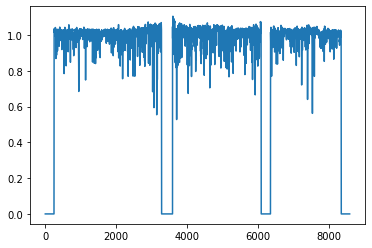

In [140]:
plt.plot(spec[0].numpy())

In [368]:
i=3
spec = spectra[i].unsqueeze(0)
z_current = z[i].unsqueeze(0)
ones = torch.ones(len(z_current),1)
z_ones = torch.cat((z_current,ones),dim=1)
z_combs = torch.combinations(z_ones[0], with_replacement=True)
z_poly = z_combs[:,0]*z_combs[:,1]
#print(z_poly.shape)
optimizer.zero_grad()
spec_pred = linear(z_poly)

In [359]:
mean_spectra = np.mean(dataset.dataset["aspcap_interpolated"],0)

(500, 700)

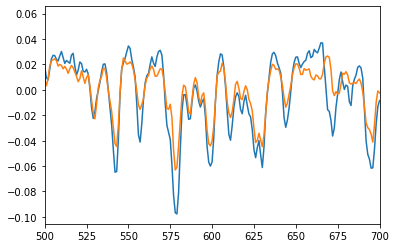

In [369]:
plt.plot(spec[0].numpy()-mean_spectra)
plt.plot(spec_pred.detach().numpy()-mean_spectra)
plt.xlim(500,700)

In [165]:
z[0]

tensor([-0.1885, -0.5907, -0.5811,  0.1261, -0.6143], grad_fn=<SelectBackward>)

In [201]:
z[:5000].shape

torch.Size([5000, 5])

# Assessing representation

In [208]:
feh_outliercut = allStar["Fe_H"]>-5
o_outliercut = allStar["O_FE"]>-5
c_outliercut = allStar["C_FE"]>-5
na_outliercut = allStar["Na_FE"]>-5
mg_outliercut = allStar["Mg_FE"]>-5
si_outliercut = allStar["Si_FE"]>-5
al_outliercut = allStar["Al_FE"]>-5
s_outliercut = allStar["S_FE"]>-5
p_outliercut = allStar["P_FE"]>-5
ti_outliercut = allStar["Ti_FE"]>-5
cr_outliercut = allStar["Cr_FE"]>-5



combined_cut = feh_outliercut & o_outliercut &  c_outliercut & na_outliercut & mg_outliercut & si_outliercut & al_outliercut & p_outliercut & s_outliercut & ti_outliercut & cr_outliercut

In [211]:
considered_parameters = ["Teff","logg","Fe_H","O_FE","C_FE","Na_FE","Mg_FE","Si_FE","S_FE","Al_FE","P_FE","Ni_FE"] 
y = vector.Vector(np.array([allStar[:n_data][combined_cut[:n_data]][param] for param in considered_parameters])[:,:n_data].T)
y_astronn = vector.AstroNNVector(allStar[:n_data][combined_cut[:n_data]],considered_parameters)

In [247]:
z_vec = vector.Vector(z[:n_data][combined_cut[:n_data]].detach().numpy(),order=2,interaction_only=False)

In [248]:
w = vector.LinearTransformation(z_vec,y)


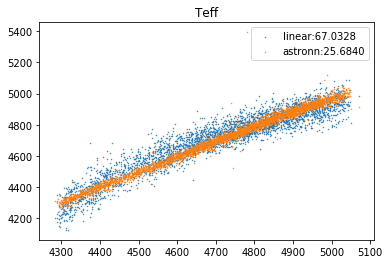

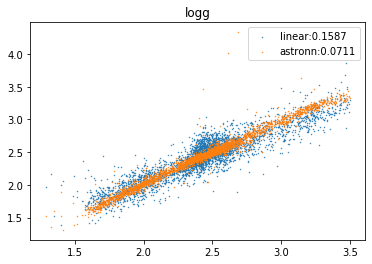

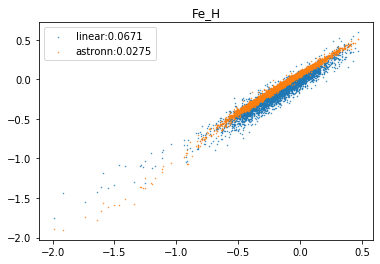

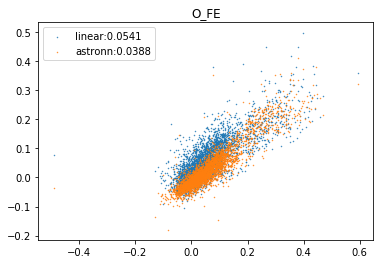

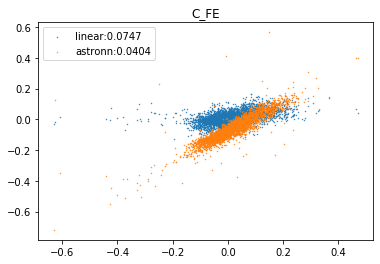

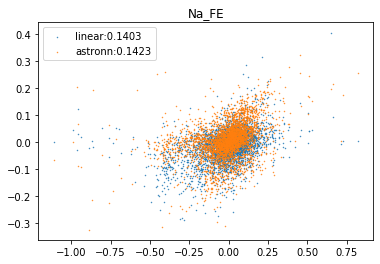

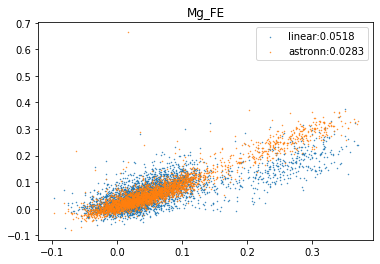

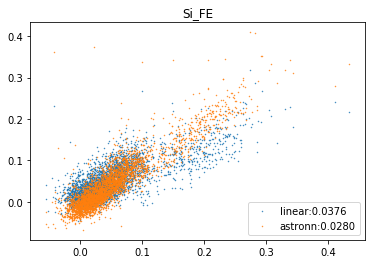

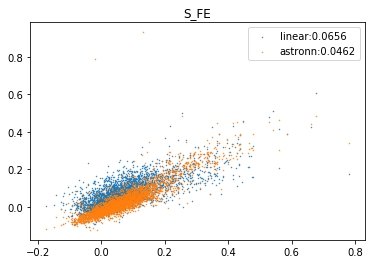

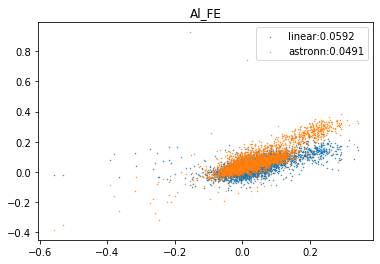

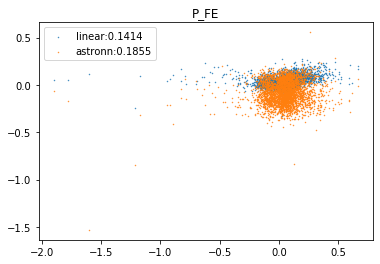

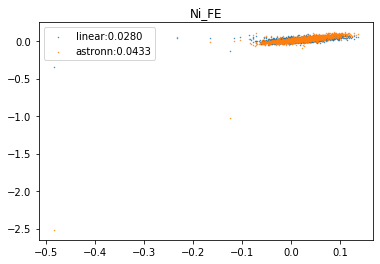

In [249]:
for i in range(len(considered_parameters)):
    plt.title(considered_parameters[i])
    #nonlinear_std = np.std(nonlinear_w.predict(z).raw[:,i]-y.raw[:,i])
    linear_std = np.std(w.predict(z_vec).raw[:,i]-y.raw[:,i])
    astronn_std = np.std(y_astronn.raw[:,i]-y.raw[:,i])


    plt.scatter(y.raw[:,i],w.predict(z_vec).raw[:,i],s=0.2,label="linear:{:.4f}".format(linear_std))
    #plt.scatter(y.raw[:,i],nonlinear_w.predict(z).raw[:,i],s=0.2,label="nonlinear:{:.4f}".format(nonlinear_std))
    plt.scatter(y.raw[:,i],y_astronn.raw[:,i],s=0.2,label="astronn:{:.4f}".format(astronn_std))

    plt.legend()
    plt.show()

In [254]:
indexes = torch.combinations(torch.arange(6), with_replacement=True)


In [262]:
indexes[:,0]

tensor([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 4, 4, 5])

In [255]:
z_ones[0][indexes]

tensor([[-0.0285, -0.0285],
        [-0.0285, -0.0298],
        [-0.0285,  0.3570],
        [-0.0285, -0.1057],
        [-0.0285, -0.0022],
        [-0.0285,  1.0000],
        [-0.0298, -0.0298],
        [-0.0298,  0.3570],
        [-0.0298, -0.1057],
        [-0.0298, -0.0022],
        [-0.0298,  1.0000],
        [ 0.3570,  0.3570],
        [ 0.3570, -0.1057],
        [ 0.3570, -0.0022],
        [ 0.3570,  1.0000],
        [-0.1057, -0.1057],
        [-0.1057, -0.0022],
        [-0.1057,  1.0000],
        [-0.0022, -0.0022],
        [-0.0022,  1.0000],
        [ 1.0000,  1.0000]], grad_fn=<IndexBackward>)

In [274]:
torch.combinations(z_ones[0], with_replacement=True)


tensor([[-0.0126, -0.0126],
        [-0.0126, -0.1264],
        [-0.0126, -0.4273],
        [-0.0126, -0.1348],
        [-0.0126, -0.0078],
        [-0.0126,  1.0000],
        [-0.1264, -0.1264],
        [-0.1264, -0.4273],
        [-0.1264, -0.1348],
        [-0.1264, -0.0078],
        [-0.1264,  1.0000],
        [-0.4273, -0.4273],
        [-0.4273, -0.1348],
        [-0.4273, -0.0078],
        [-0.4273,  1.0000],
        [-0.1348, -0.1348],
        [-0.1348, -0.0078],
        [-0.1348,  1.0000],
        [-0.0078, -0.0078],
        [-0.0078,  1.0000],
        [ 1.0000,  1.0000]], grad_fn=<StackBackward>)

In [283]:
left = torch.index_select(z_ones, 1, indexes[:,0])
right = torch.index_select(z_ones, 1, indexes[:,1])

In [284]:
left.shape

torch.Size([20000, 21])

In [271]:
ones = torch.ones(len(z),1)
z_ones = torch.cat((z,ones),dim=1)

In [273]:
z_ones.shape

torch.Size([20000, 6])

In [279]:
z_ones.shape[1]

6

In [295]:
def expand(z):
    indexes = torch.combinations(torch.arange(z.shape[1]), with_replacement=True)
    left = torch.index_select(z, 1, indexes[:,0])
    right = torch.index_select(z, 1, indexes[:,1])
    return left*right
    

In [296]:
expand()

tensor([[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]])

In [350]:
poly.fit_transform(z[0:4].detach().numpy())

array([[ 1.0000000e+00, -1.2637479e-02, -1.2635747e-01, -4.2725509e-01,
        -1.3481523e-01, -7.7821393e-03,  1.5970589e-04,  1.5968399e-03,
         5.3994274e-03,  1.7037247e-03,  9.8346623e-05,  1.5966209e-02,
         5.3986870e-02,  1.7034911e-02,  9.8333135e-04,  1.8254691e-01,
         5.7600494e-02,  3.3249587e-03,  1.8175146e-02,  1.0491509e-03,
         6.0561691e-05],
       [ 1.0000000e+00, -7.3332615e-02, -6.2342219e-02, -1.0651821e-01,
        -5.4157544e-02,  5.6285165e-02,  5.3776726e-03,  4.5717182e-03,
         7.8112590e-03,  3.9715143e-03, -4.1275383e-03,  3.8865523e-03,
         6.6405814e-03,  3.3763014e-03, -3.5089422e-03,  1.1346129e-02,
         5.7687648e-03, -5.9953951e-03,  2.9330396e-03, -3.0482663e-03,
         3.1680199e-03],
       [ 1.0000000e+00, -6.6300996e-02, -3.0270126e-01, -3.8123470e-02,
        -1.2995979e-01, -1.0216097e-01,  4.3958221e-03,  2.0069396e-02,
         2.5276239e-03,  8.6164633e-03,  6.7733740e-03,  9.1628052e-02,
         1.154

In [348]:
expand(z_ones[0:4])

tensor([[ 1.5971e-04,  1.5968e-03,  5.3994e-03,  1.7037e-03,  9.8347e-05,
         -1.2637e-02,  1.5966e-02,  5.3987e-02,  1.7035e-02,  9.8333e-04,
         -1.2636e-01,  1.8255e-01,  5.7600e-02,  3.3250e-03, -4.2726e-01,
          1.8175e-02,  1.0492e-03, -1.3482e-01,  6.0562e-05, -7.7821e-03,
          1.0000e+00],
        [ 5.3777e-03,  4.5717e-03,  7.8113e-03,  3.9715e-03, -4.1275e-03,
         -7.3333e-02,  3.8866e-03,  6.6406e-03,  3.3763e-03, -3.5089e-03,
         -6.2342e-02,  1.1346e-02,  5.7688e-03, -5.9954e-03, -1.0652e-01,
          2.9330e-03, -3.0483e-03, -5.4158e-02,  3.1680e-03,  5.6285e-02,
          1.0000e+00],
        [ 4.3958e-03,  2.0069e-02,  2.5276e-03,  8.6165e-03,  6.7734e-03,
         -6.6301e-02,  9.1628e-02,  1.1540e-02,  3.9339e-02,  3.0924e-02,
         -3.0270e-01,  1.4534e-03,  4.9545e-03,  3.8947e-03, -3.8123e-02,
          1.6890e-02,  1.3277e-02, -1.2996e-01,  1.0437e-02, -1.0216e-01,
          1.0000e+00],
        [ 2.4951e-04,  5.9968e-03, -1.2925e

In [352]:
expand(z_ones[0:4]).shape

torch.Size([4, 21])

In [342]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2,interaction_only=False,include_bias=True)
chain = list(poly._combinations(len(z_ones[0])-1,2,interaction_only=True,include_bias=True))

In [330]:
len(chain)

16

In [335]:
chain

[(),
 (0,),
 (1,),
 (2,),
 (3,),
 (4,),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (1, 2),
 (1, 3),
 (1, 4),
 (2, 3),
 (2, 4),
 (3, 4)]

In [324]:
indexes = torch.combinations(torch.arange(z.shape[1]), with_replacement=True)
len(indexes)

15

In [334]:
indexes

tensor([[0, 0],
        [0, 1],
        [0, 2],
        [0, 3],
        [0, 4],
        [1, 1],
        [1, 2],
        [1, 3],
        [1, 4],
        [2, 2],
        [2, 3],
        [2, 4],
        [3, 3],
        [3, 4],
        [4, 4]])